Kaggle dataset

In [9]:
import pandas as pd
%matplotlib inline
%config InlineBackend.figure_formats = ['jpg']
import matplotlib
matplotlib.figure.Figure.__repr__ = lambda self: (
    f"<{self.__class__.__name__} size {self.bbox.size[0]:g}"
    f"x{self.bbox.size[1]:g} with {len(self.axes)} Axes>")

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline
covid19 = pd.read_csv("./kaggle_set/covid_19_clean_complete.csv")

In [2]:
covid19

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.000000,65.000000,1/22/20,0,0,0
1,NaN,Albania,41.153300,20.168300,1/22/20,0,0,0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0,0,0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0,0,0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0,0,0
...,...,...,...,...,...,...,...,...
16363,NaN,Saint Kitts and Nevis,17.357822,-62.782998,3/27/20,2,0,0
16364,Northwest Territories,Canada,64.825500,-124.845700,3/27/20,1,0,0
16365,Yukon,Canada,64.282300,-135.000000,3/27/20,3,0,0
16366,NaN,Kosovo,42.602636,20.902977,3/27/20,86,1,1


In [22]:
per_day = covid19[["Date","Confirmed","Deaths","Recovered"]].groupby("Date").agg(["sum"]).reset_index()
confirmed = per_day["Confirmed"].cumsum()
dead = per_day["Deaths"].cumsum()
recovered = per_day["Recovered"].cumsum()
per_day

,Date,Confirmed,Deaths,Recovered
,,sum,sum,sum
0,1/22/20,555,17,28
1,1/23/20,654,18,30
2,1/24/20,941,26,36
3,1/25/20,1434,42,39
4,1/26/20,2118,56,52
...,...,...,...,...
61,3/5/20,97886,3348,53790
62,3/6/20,101801,3460,55859
63,3/7/20,105847,3558,58350


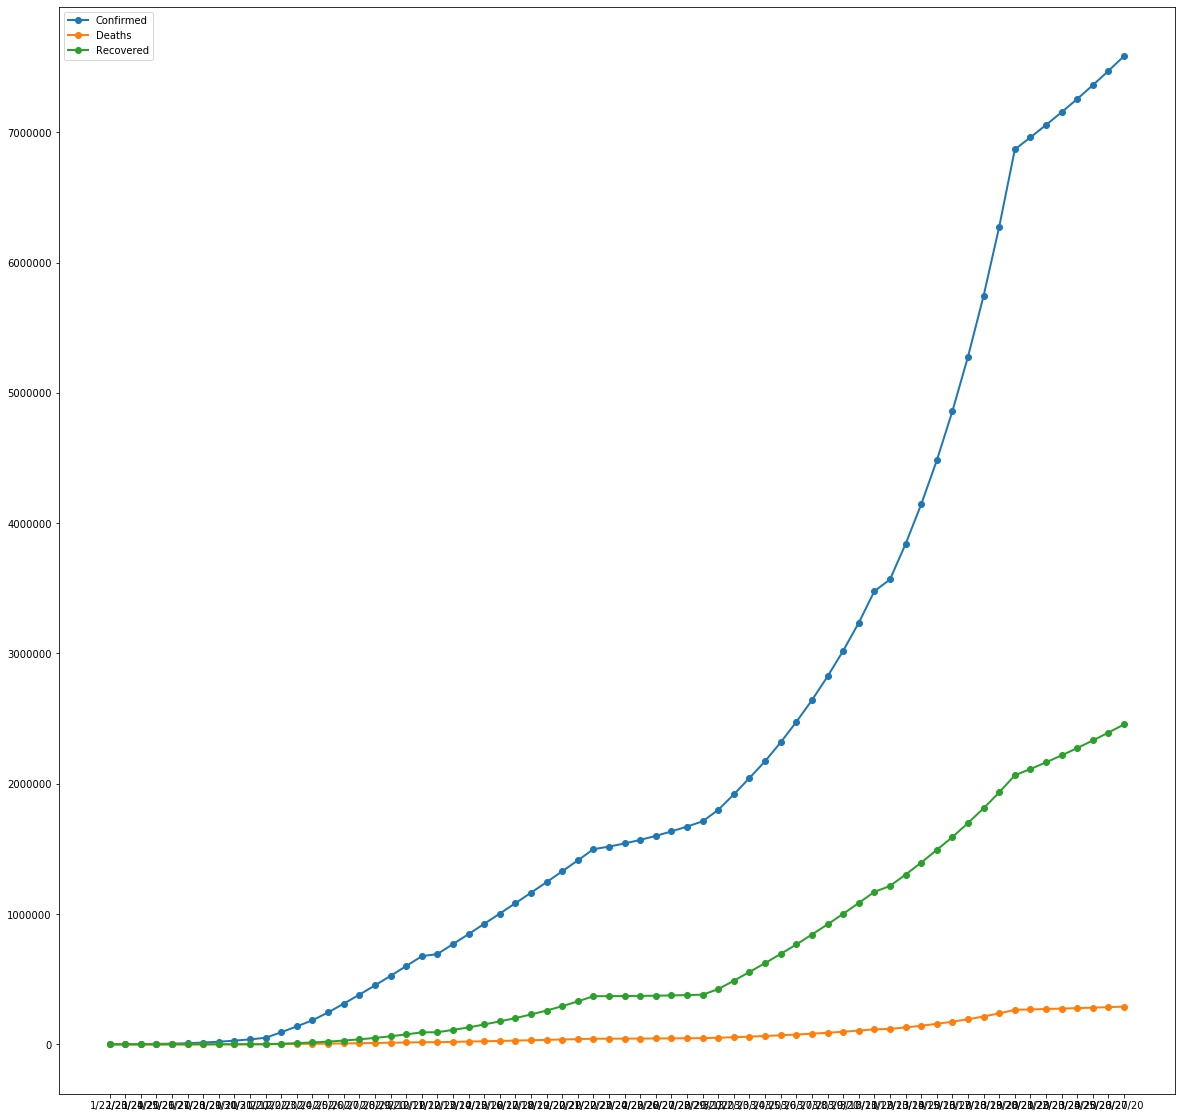

In [33]:
plt.figure(figsize=( 20,20 ))
plt.plot( covid19["Date"].unique(), confirmed, 'o-',linewidth=2.0, label="Confirmed")
plt.plot( covid19["Date"].unique(), dead, 'o-',linewidth=2.0, label="Deaths")
plt.plot( covid19["Date"].unique(), recovered, 'o-',linewidth=2.0, label="Recovered")
plt.legend()
plt.show()